In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

import sys

sys.path.append("../incl/")

import ELPH_dyn
import ELPH_utils


#global hyperparameters
kmax = 4.
n_kmax = 200

tmax = 2000
n_tmax = 400

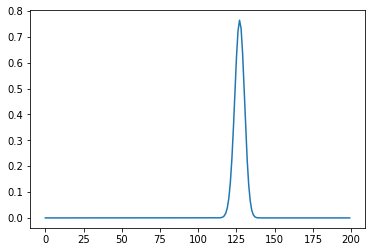

In [2]:
init = ELPH_dyn.get_init_cond_gauss(kmax = kmax, n_kmax = n_kmax, max_pos = 0.5, width = 0.025, density=0.05)
plt.plot(init[:n_kmax])
plt.show()

nkdyn = ELPH_dyn.get_full_dynamics(init, n_kmax = n_kmax, tmax=tmax, n_tmax=n_tmax)

In [3]:
data = nkdyn[:,0,:].T

ELPH_utils.save_runs([data], '/home/agluedge/Preprints/ELPH/example_run')

In [4]:
# data = ELPH_utils.load_runs(filename='/home/agluedge/Preprints/ELPH/example_run.npz')[0]
# print('example run loaded with shape: ', test_run.shape)

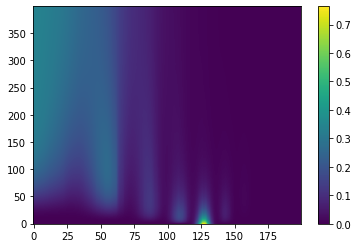

In [5]:
plt.imshow(data.T, aspect='auto', origin='lower')
plt.colorbar()
plt.show()

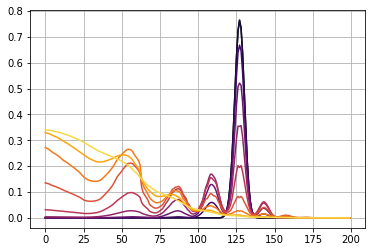

In [6]:

colors = plt.get_cmap('inferno')
tn_arr = np.geomspace(1,n_tmax,10,dtype=int)-1


plt.grid()

for k,tn in enumerate(tn_arr):
    plt.plot(data[:,tn], '-', c=colors(k/len(tn_arr)))

plt.show()

<IPython.core.display.Javascript object>


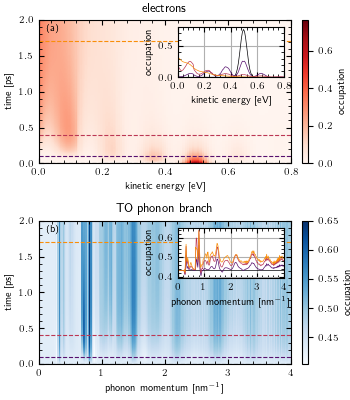

In [8]:
electrons = nkdyn[:,0,:].T
phonons = nkdyn[:,1,:].T
tvals = np.linspace(0,tmax,n_tmax)
E_el = ELPH_dyn.electron_dispersion(np.linspace(0,kmax,electrons.shape[0],endpoint=True),0)
E_ph = ELPH_dyn.phonon_dispersion(np.linspace(0,kmax,phonons.shape[0],endpoint=True),0,0)
k_arr = np.linspace(0,kmax,phonons.shape[0],endpoint=True)



# tn_arr = [0,15,80,350]

tn_arr = np.array([0,0.1,0.4,1.7])*400/2.0
tn_arr = tn_arr.astype(int)


####################################################
####################################################
####################################################

%matplotlib notebook

from matplotlib import rc
rc('text', usetex=True)

from matplotlib import gridspec
import matplotlib.ticker as ticker

fs = 7
fig = plt.figure(figsize=(3.5,4))
plt.rcParams.update({'font.size': fs})
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[1,0.025], height_ratios=[1,1])




####################################################
####################################################
####################################################


ax00 = plt.subplot(gs[0,0])

plt.title('electrons')

# extent = [0,tmax*1e-3, 0, kmax]
# plt.imshow(electrons, aspect='auto', origin='lower', extent=extent, interpolation='none', cmap='Reds')
im = plt.pcolormesh(E_el,tvals*1e-3,electrons.T, cmap='Reds', shading='auto', rasterized=True)


for k,tn in enumerate(tn_arr):
    plt.axhline(y=tvals[tn]*1e-3, xmin=0, xmax=1, ls='--', color=colors(k/len(tn_arr)),  lw = 0.8)


plt.xlabel('kinetic energy [eV]')
plt.ylabel('time [ps]')

plt.ylim(0,2)
plt.xlim(0,0.8)

# cbar = plt.colorbar()
# cbar.set_label('occupation')

ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')


ax00.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
# ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax00.xaxis.set_minor_locator(ticker.MultipleLocator(0.04))
#ax00.yaxis.set_major_formatter(ticker.NullFormatter())
#ax00.yaxis.set_minor_formatter(ticker.NullFormatter())


axins = ax00.inset_axes([0.55, 0.6, 0.42, 0.35])

colors = plt.get_cmap('inferno')
# tn_arr = np.geomspace(1,n_tmax,5,dtype=int)-1

axins.grid()
for k,tn in enumerate(tn_arr):
    axins.plot(E_el,electrons[:,tn], '-', c=colors(k/len(tn_arr)),  lw = 0.5)

axins.set_xlabel('kinetic energy [eV]')
axins.set_ylabel('occupation')
axins.set_xlim(0,0.8)
axins.set_ylim(0,0.8)

axins.xaxis.set_ticks_position('both')
axins.yaxis.set_ticks_position('both')
axins.tick_params(which='both', direction='in', color='k')

axins.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
axins.xaxis.set_minor_locator(ticker.MultipleLocator(0.04))
# ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

axins.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
axins.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
#axins.yaxis.set_major_formatter(ticker.NullFormatter())
#axins.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.03, 0.97,r'(a)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)


axCB = plt.subplot(gs[0,1])

cb = plt.colorbar(im, cax = axCB)
cb.set_label(r"occupation")


####################################################
####################################################
####################################################

ax00 = plt.subplot(gs[1,0])

plt.title('TO phonon branch')

# extent = [0,tmax*1e-3, 0, kmax]
# plt.imshow(electrons, aspect='auto', origin='lower', extent=extent, interpolation='none', cmap='Reds')
im = plt.pcolormesh(k_arr,tvals*1e-3,phonons.T, cmap='Blues', shading='auto', rasterized=True)


for k,tn in enumerate(tn_arr):
    plt.axhline(y=tvals[tn]*1e-3, xmin=0, xmax=4, ls='--', color=colors(k/len(tn_arr)),  lw = 0.8)


plt.xlabel('phonon momentum [nm$^{-1}$]')
plt.ylabel('time [ps]')

plt.ylim(0,2)
# plt.ylim(0,0.7)

# cbar = plt.colorbar()
# cbar.set_label('occupation')

ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')


ax00.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
# ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax00.xaxis.set_minor_locator(ticker.MultipleLocator(0.2))
#ax00.yaxis.set_major_formatter(ticker.NullFormatter())
#ax00.yaxis.set_minor_formatter(ticker.NullFormatter())


axins = ax00.inset_axes([0.55, 0.6, 0.42, 0.35])

colors = plt.get_cmap('inferno')
# tn_arr = np.geomspace(1,n_tmax,5,dtype=int)-1



axins.grid()
for k,tn in enumerate(tn_arr):
    axins.plot(k_arr,phonons[:,tn], '-', c=colors(k/len(tn_arr)), lw = 0.5)

axins.set_xlabel('phonon momentum [nm$^{-1}$]')
axins.set_ylabel('occupation')
axins.set_xlim(0,4.0)
# axins.set_ylim(0,0.8)

axins.xaxis.set_ticks_position('both')
axins.yaxis.set_ticks_position('both')
axins.tick_params(which='both', direction='in', color='k')

axins.xaxis.set_major_locator(ticker.MultipleLocator(1))
axins.xaxis.set_minor_locator(ticker.MultipleLocator(0.2))
# ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

axins.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
axins.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))
#axins.yaxis.set_major_formatter(ticker.NullFormatter())
#axins.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.03, 0.97,r'(b)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)

axCB = plt.subplot(gs[1,1])

cb = plt.colorbar(im, cax = axCB)
cb.set_label(r"occupation")


####################################################
####################################################
####################################################

# plt.tight_layout()

plt.subplots_adjust(left=0.11, bottom=0.09, right=0.88, top=0.95, wspace=0.08, hspace=0.4)

plt.savefig('/home/agluedge/Preprints/ELPH/figs/dynamics.pdf', dpi=300)
plt.show()
